# **E-Comerce Customer Churn Predict**

# **Business Problem Understanding**

**Context**

Perusahaan ini adalah sebuah platform e-commerce yang melayani berbagai kategori produk, termasuk fashion, elektronik, dan kebutuhan sehari-hari. Perusahaan telah beroperasi cukup lama dan memiliki basis pelanggan yang cukup besar, sebagaimana tercermin dari data pelanggan yang menunjukkan variasi preferensi kategori belanja, serta riwayat penggunaan layanan (tenure). Dalam operasionalnya, perusahaan ini juga memiliki kebijakan cashback yang bertujuan untuk meningkatkan loyalitas pelanggan. Selain itu, data menunjukkan adanya fitur pelayanan pelanggan, seperti penanganan komplain, yang mencerminkan upaya perusahaan dalam menjaga kualitas layanan.

Namun, di tengah kompetisi industri e-commerce yang sangat ketat, perusahaan mulai menghadapi tantangan dalam mempertahankan pelanggannya. Fenomena customer churn atau berpindahnya pelanggan ke platform lain menjadi perhatian utama, karena berdampak langsung terhadap pendapatan dan keberlanjutan bisnis.

Terdapat dua cara untuk mengatasi fenomena customer churn, agar perusahaan dapat mempertahankan keuntungan. Pertama yaitu mempertahankan customer lama agar menetap (customer retentions) dan cara kedua yaitu mencari customer baru (customer acquisition). Berdasarkan statistik dari berbagai industri bisnis, hasil riset menemukan bahwa **customer acquisition memiliki biaya 5 kali lipat lebih dari customer retention.** ([*source*](https://www.huify.com/blog/acquisition-vs-retention-customer-lifetime-value))

**Customer retention list :**

- Biaya campaign loyalitas

- Diskon khusus pelanggan

- Cashback

- Biaya email/pesan promosi

- Program loyalti

Kita asumsikan perusahaan per tahunnya menggelontorkan dana $100.000 untuk memaintain 1000 customer lama, maka :

- Customer Retention Cost :
$$
\text{Retention Cost per Customer} = \frac{100.000}{1000} = \$ 100\text{ per customer}
$$

- Customer Acquisition Cost:

$$
\text{Acquisition Cost per Customer} = \text{Retention Cost per Customer} \times 5 = \$ 500 \text{ per customer}
$$
([*Source*](https://www.clv-calculator.com/customer-costs/retention-costs-clv/retention-cost-formula/))

Dengan demikian diasumsikan untuk melakukan Customer Retention perusahaan menggunakan anggaran sebesar $100 per customer, sedangkan jika melakukan Customer Acquisition perusahaan mengeluarkan anggaran 5 kali lipat dari Customer Retention yaitu $500. 



**Problem Statement**

Perusahaan tidak memiliki sistem yang dapat mengidentifikasi pelanggan yang berisiko churn secara proaktif. Jika semua pelanggan diperlakukan sama tanpa segmentasi, maka strategi retensi menjadi tidak efisien dari segi biaya, waktu, dan sumber daya. Oleh karena itu, perusahaan perlu memahami karakteristik pelanggan yang berpotensi churn agar dapat memberikan perhatian khusus dan personalisasi layanan kepada mereka sebelum mereka benar-benar pergi.

**Goal**

Perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang pelanggan akan churn, sehingga divisi pemasaran dapat mengambil tindakan preventif seperti memberikan penawaran khusus, diskon, atau kampanye personalisasi.

**Analytic Approach**

Langkah yang akan dilakukan antara lain:

- Melakukan analisis eksploratif pada data untuk memahami data leih dalam.

- Melakukan feature engineering untuk meningkatkan kualitas input ke dalam model.

- Membangun model klasifikasi yang dapat memprediksi kemungkinan pelanggan churn.

**Metric Evaluation**

- **Target:**

    - 0 : Tidak churn / masih menjadi pelanggan aktif

    - 1 : Churn / sudah tidak menggunakan layanan


- **False Positive (FP):**

    - Model memprediksi pelanggan akan churn, padahal sebenarnya tidak.

    - **Risiko bisnis:** Perusahaan akan melakukan Customer Retention (seperti diskon, promo, atau campaign retensi) untuk pelanggan yang sebenarnya tetap loyal.

    - **Estimasi kerugian:** $100 per pelanggan.


- **False Negative (FN):**

    - Model memprediksi pelanggan akan tetap, padahal sebenarnya churn.

    - **Risiko bisnis:** Perusahaan gagal mencegah churn, beresiko kehilangan pelanggan bernilai tinggi tanpa upaya retensi. Sehingga perusahaan akan melakukan Customer Acquisition

    - **Estimasi kerugian:** $500 per pelanggan.

**Kesimpulan Evaluasi:**

- Berdasarkan kerugiannya False Negative (FN) lebih berisiko, serta dapat beresiko mengakibatkan hilangnya pelanggan loyal yang sebenarnya masih bisa dipertahankan. Namun, False Positive (FP) juga perlu dikendalikan, mengingat Customer Retention yang sebenarnya tidak perlu bisa cukup besar, dan waktu yang digunakan untuk upaya tersebut seharusnya dapat dialokasikan untuk aktivitas bisnis lainnya yang lebih efektif.

- Oleh karena itu, metrik evaluasi yang akan digunakan adalah **F2-score**, yang memberikan bobot lebih besar pada recall (mengurangi FN), tetapi tetap mempertimbangkan precision untuk mengontrol FP.


# **Data Understanding**

**Columns Descriptions**

| Kolom                   | Deskripsi                                                                 |
|------------------------|---------------------------------------------------------------------------|
| Tenure                 | Lama waktu (dalam bulan) pelanggan telah terdaftar.                       |
| WarehouseToHome        | Jarak (kemungkinan dalam km) antara gudang dan rumah pelanggan.          |
| NumberOfDeviceRegistered | Jumlah perangkat yang terdaftar di akun pelanggan.                     |
| PreferedOrderCat       | Kategori produk yang paling sering dipesan pelanggan.                    |
| SatisfactionScore      | Skor kepuasan pelanggan (kemungkinan skala 1–5).                         |
| MaritalStatus          | Status pernikahan pelanggan (Single, Married, Divorced).                |
| NumberOfAddress        | Jumlah alamat yang terdaftar di akun pelanggan.                         |
| Complain               | Apakah pelanggan pernah komplain (0 = tidak, 1 = ya).                    |
| DaySinceLastOrder      | Jumlah hari sejak pemesanan terakhir oleh pelanggan.                    |
| CashbackAmount         | Jumlah cashback yang diterima oleh pelanggan.                           |
| Churn                  | Apakah pelanggan berhenti menggunakan layanan (0 = tidak, 1 = ya).       |


**Note :**
- Dataset ini berisi informasi pelanggan dari sebuah platform e-commerce, di mana setiap satu baris (row) menginformasikan data historis dan behavioral dari satu pelanggan unik. 
- Salah satu fitur utama dalam dataset ini adalah variabel Churn, yang menunjukkan apakah pelanggan tersebut telah berhenti menggunakan layanan (1) atau masih aktif (0). Variabel ini menjadi target utama dalam analisis prediktif untuk memahami pola dan faktor-faktor yang berkontribusi terhadap hilangnya pelanggan.

# **Import Library & Load Dataset**

In [5]:
#Data Manipulation
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Statistic Method
from scipy.stats import normaltest

#Data Splitting
from sklearn.model_selection import train_test_split

#Binning
from sklearn.preprocessing import KBinsDiscretizer

#Column transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer, KNNImputer

#Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder
from category_encoders.binary import BinaryEncoder

#Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

#Imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

#Cross Validation
from sklearn.model_selection import StratifiedKFold, KFold,cross_val_score, cross_validate

# model clasification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Model Ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier, VotingRegressor, StackingRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Scoring
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#Deploy
import pickle

#Warning Hide
import warnings
warnings.filterwarnings('ignore')


## **Dataset Informations**

In [6]:
df.drop(columns="Churn").columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [7]:
df=pd.read_csv('data_ecommerce_customer_churn.csv')
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [9]:
df.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [10]:
df.duplicated().sum()

671

Insight :
- Dataset terdiri dari 3941 baris dan 11 kolom
- Mayoritas tipe data merupakan numerikal (Int/Float) namun terdapat 2 kolom kategorikal (Str/object) 
- Terdapat missing value pada kolom `Tenure`, `WarehouseToHome`, dan `DaySinceLastOrder`, kolom dengan missing value ini akan di handle dengan Imputer pada Data Preprocessing
- Terdapat 671 data duplicate pada dataset, data duplicate dapat mempengaruhi prediksi Machine Learning dengan demikian akan di drop.

## **Data Cleaning**

### **Drop Duplicate**

In [11]:
df.drop_duplicates(inplace=True)

### **Unique Value**

In [12]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Tenure,float64,160,4.89,36,"[28.0, 51.0]"
1,WarehouseToHome,float64,135,4.13,33,"[13.0, 17.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[6, 5]"
3,PreferedOrderCat,object,0,0.00,6,"[Grocery, Mobile]"
4,SatisfactionScore,int64,0,0.00,5,"[4, 3]"
5,MaritalStatus,object,0,0.00,3,"[Divorced, Single]"
6,NumberOfAddress,int64,0,0.00,14,"[11, 9]"
7,Complain,int64,0,0.00,2,"[1, 0]"
8,DaySinceLastOrder,float64,181,5.54,22,"[16.0, 15.0]"
9,CashbackAmount,float64,0,0.00,2335,"[150.96, 120.58]"


Insight :
- Sebanyak 671 data duplicate di hapus untuk memaksimalkan prediksi dari Machine Learning.
- Terlihat tidak ada kolom yang berisikan Unique Value yang banyak, kecuali CashbackAmount. Namun kolom tersebut merupakan kolom bertipe Numerikal Kontinu, jadi akan diatasi dengan Scaling.
- Data yang berisikan Missing Value akan di handle dengan Imputer pada bagian Data Preporcessing

# **EDA**

## **Target Proportions**

In [13]:
df['Churn'].value_counts()

Churn
0    2736
1     534
Name: count, dtype: int64

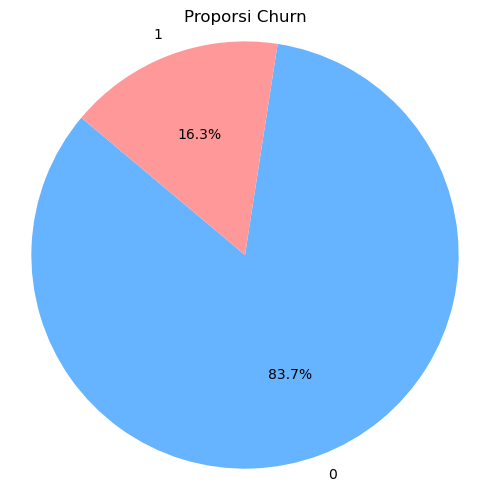

In [14]:
class_counts = df['Churn'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Proporsi Churn')
plt.axis('equal')  # Biar pie-nya bulat
plt.tight_layout()
plt.show()

Insight :
- Target terdiri dari 2736 pelanggan Churn dan 534 pelanggan churn. Atau dalam persentase yaitu 84% dibanding 16%
- Karena proporsi target tidak seimbang maka akan ditangani dengan Resampler

## **Data Distributions**

**Numerical Continuous Data**

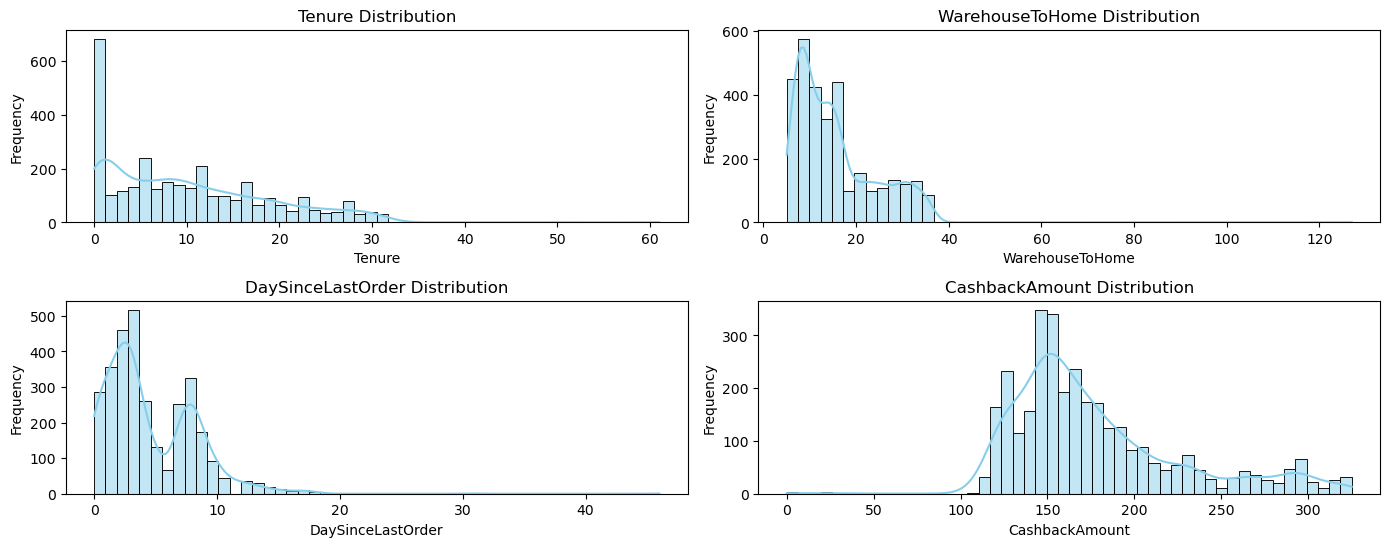

In [15]:
numerikal_col=['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']

plt.figure(figsize=(14, 16))
for i, data in enumerate(numerikal_col):
    plt.subplot(6, 2, i+1)
    sns.histplot(df[data], kde=True, bins=50, color='skyblue')
    plt.title(f'{data} Distribution')
    plt.xlabel(data)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Normaltest**

Untuk membuktikan distribusi data yang lebih jelas maka akan diuji secara statistik. Data akan diuji dengan metode D'Agostino and Pearson's Test karena merupakan sample besar (n>50)

Hypotesis:
- H0: Data terdistribusi normal
- H1: Data tidak terdistribusi normal

Kesimpulan:
- pvalue>0.05-->gagal menolak H0-->Data terdistribusi normal
- pvalue<0.05-->berhasil menolak H0-->Data tidak terdistribusi normal

In [16]:
cart={'Data':[],
      'P-value':[],
      'Distribusi':[]}


for data in numerikal_col:
    stats, pvalue=normaltest(df[data].dropna())
    if pvalue>=0.05:
        status='normal'
        cart['Data'].append(data)
        cart['P-value'].append(pvalue)
        cart['Distribusi'].append(status)

    else:
        status='Tidak normal'
        cart['Data'].append(data)
        cart['P-value'].append(pvalue)
        cart['Distribusi'].append(status)

datanorm=pd.DataFrame(cart)
datanorm=datanorm.sort_values(by='P-value', ascending=False)
datanorm

,Data,P-value,Distribusi
0,Tenure,4.777686e-61,Tidak normal
3,CashbackAmount,3.427377e-109,Tidak normal
2,DaySinceLastOrder,4.670836e-224,Tidak normal
1,WarehouseToHome,5.855630e-257,Tidak normal


Insight :
- Berdasarkan grafik hisplot pada data numerikal, terlihat seluruh data tidak terdistribusi normal.
- Hal ini juga dibuktikan pada uji statistik, dimana seluruh nilai P-Value kurang dari 0.05 yang berarti data tidak terdistribusi normal

**Numerical Discrete and Categorical Data**

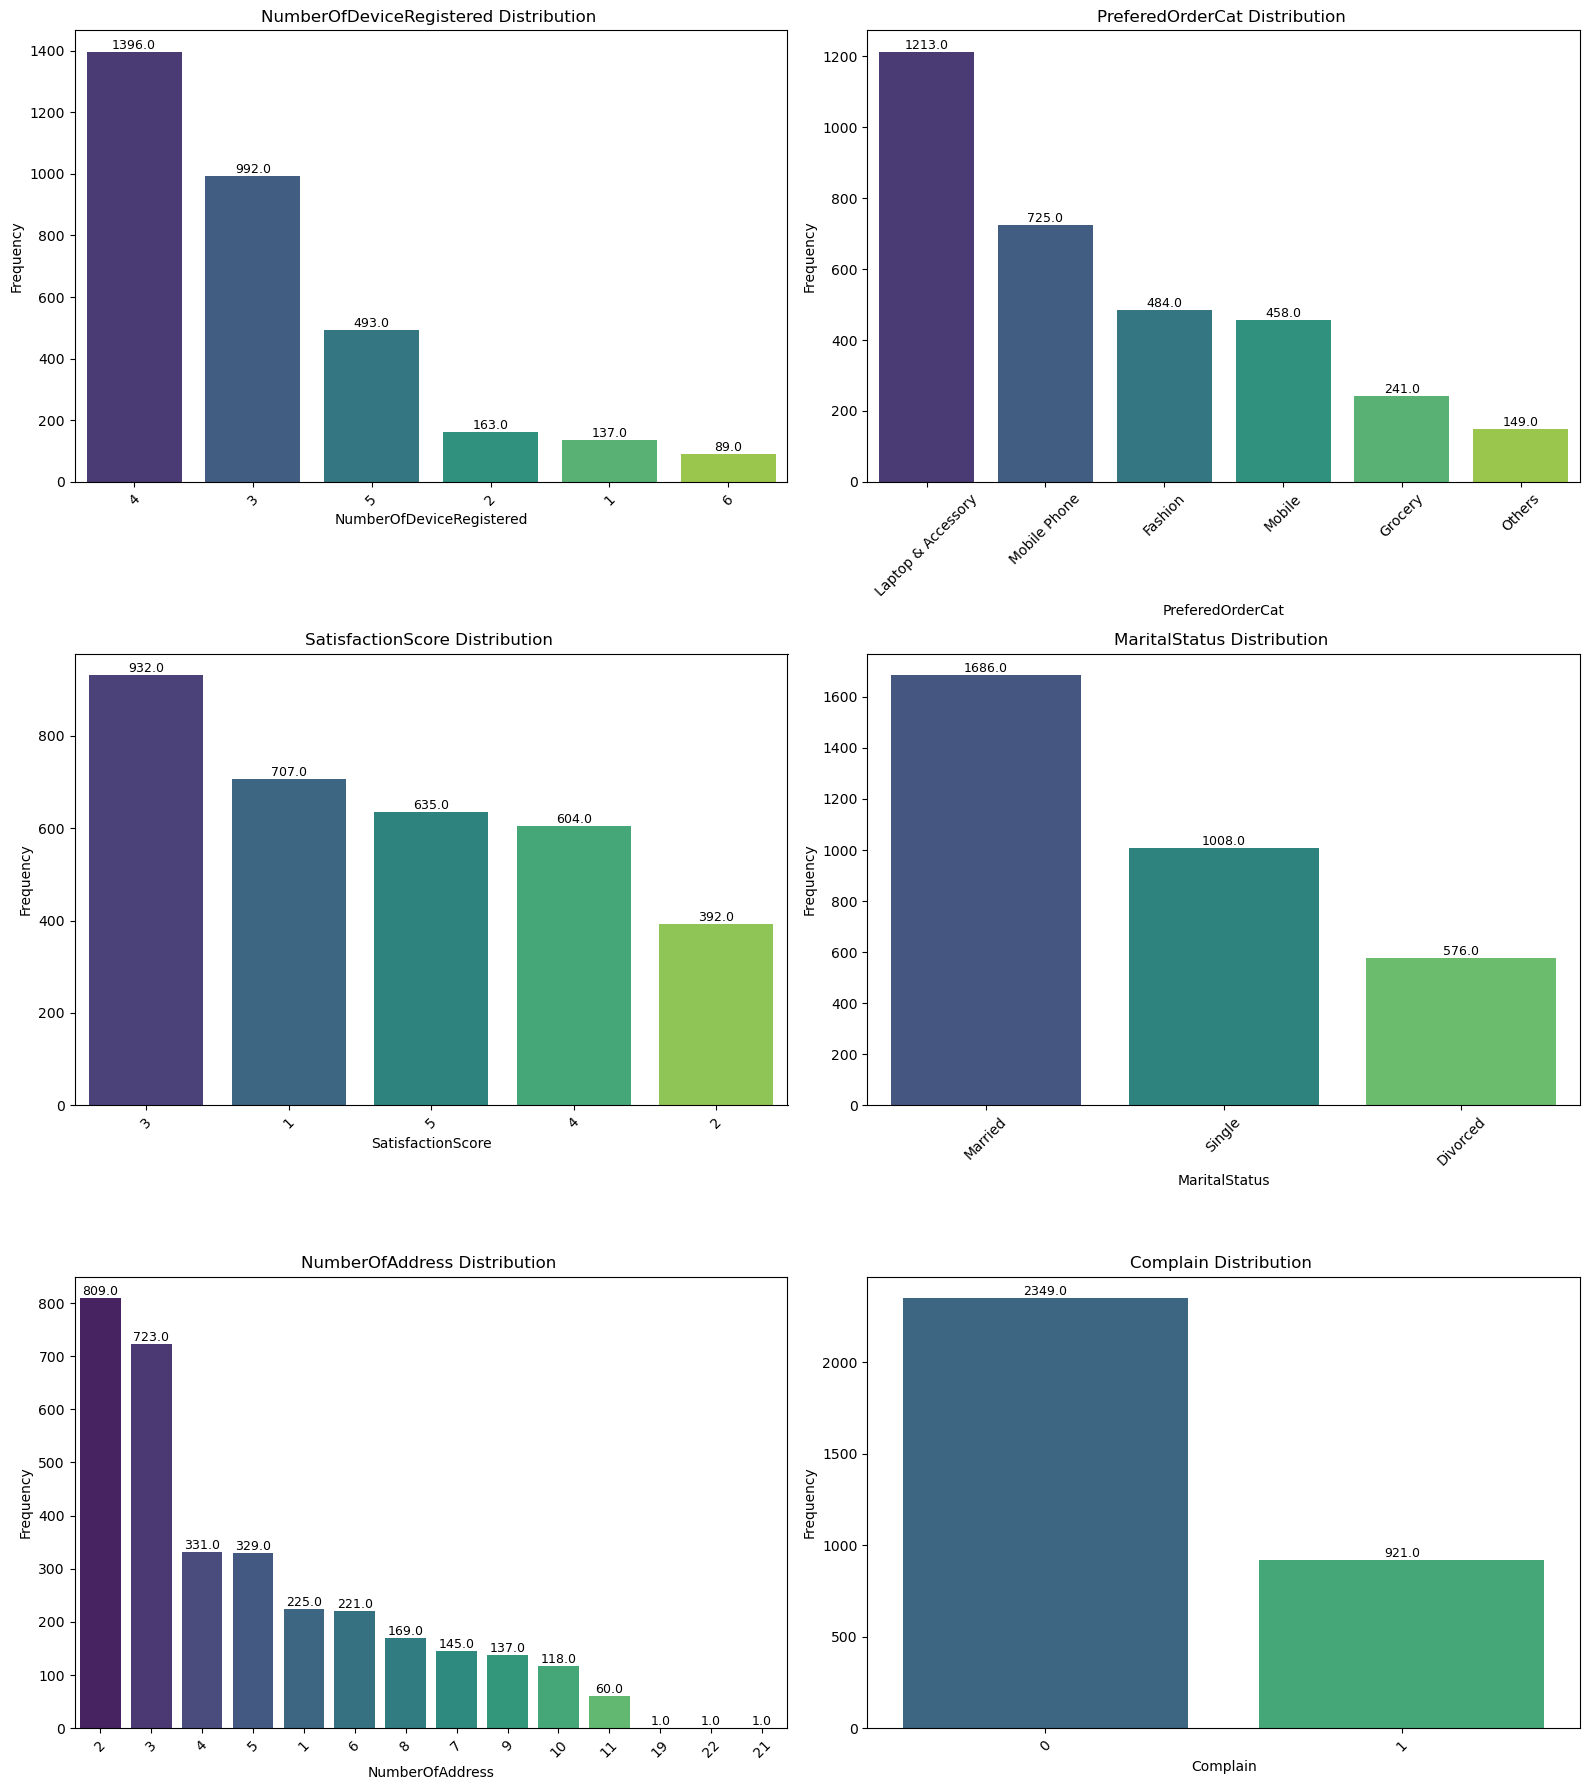

In [17]:
cat_col = ['NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']

plt.figure(figsize=(16, 18))

for i, col in enumerate(cat_col):
    plt.subplot(3, 2, i+1)

    # Hitung frekuensi dan urutkan
    order = df[col].value_counts().sort_values(ascending=False).index

    # Buat countplot
    ax = sns.countplot(data=df, x=col, order=order, palette='viridis')

    # Annotasi jumlah di atas setiap bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=9, color='black')

    plt.title(f'{col} Distribution ')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [18]:
df[df['NumberOfAddress']>11]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
1581,NaN,10.0,3,Mobile,2,Single,19,1,0.0,122.85,1
2109,13.0,16.0,4,Laptop & Accessory,4,Single,22,0,4.0,192.82,0
3494,12.0,15.0,3,Laptop & Accessory,4,Single,21,0,3.0,167.82,0


In [19]:
df=df[~(df['NumberOfAddress']>11)]

Insight :
- Pada kolom NumberOfAddress,  ditemukan bahwa terdapat orang dengan jumlah alamat 19, 20, dan 21 yang masing-masing hanya muncul sebanyak satu kali. 
- Hal ini dapat mempengaruhi predikisi Machine Learning jadi akan dihapus saja

## **Outliers**

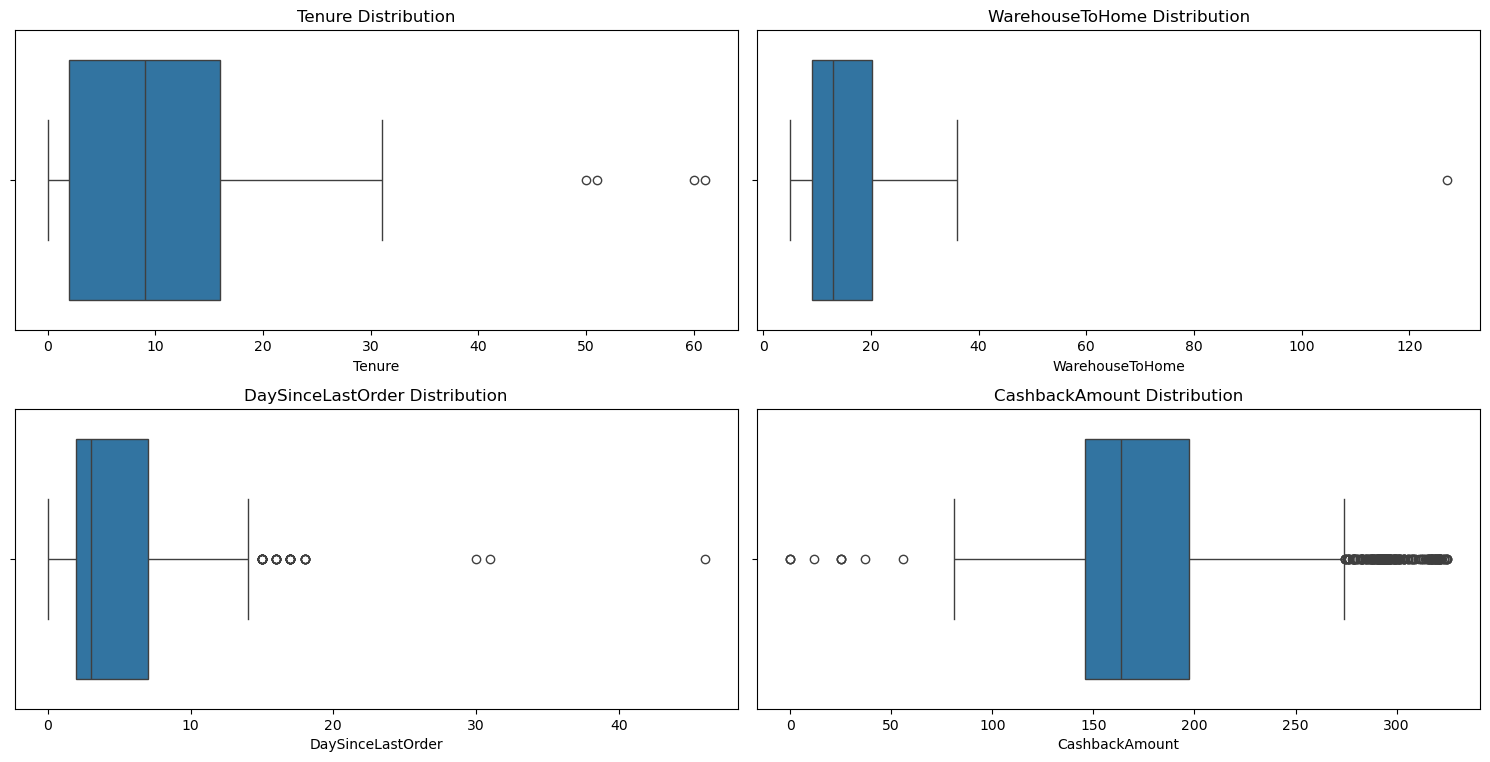

In [20]:
numerikal_col=['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']

plt.figure(figsize=(15, 30))
for i, data in enumerate(numerikal_col):
    plt.subplot(8, 2, i+1)
    sns.boxplot(x=df[data])
    plt.title(f'{data} Distribution')
    plt.xlabel(data)


plt.tight_layout()
plt.show()

Insight :
- Pada boxplot terlihat bahwa kolom `Tenure`, `WarehouseToHome`, dan `DaySinceLastOrder` memiliki Outlier yang terlihat signifikan

### **Visualisasi Outlier berdasarkan Target**

**Tenure**

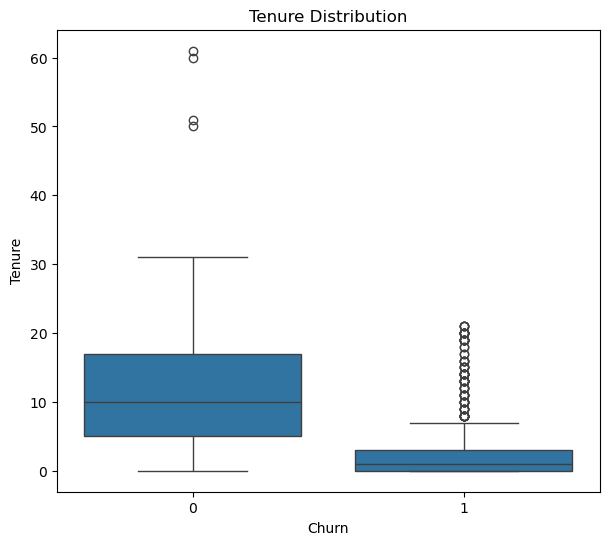

In [21]:
plt.figure(figsize=(7, 6))
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title('Tenure Distribution')
plt.xlabel('Churn')

plt.show()

In [22]:
df[df['Tenure']>40]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
51,61.0,28.0,4,Grocery,1,Married,6,1,1.0,303.75,0
449,51.0,7.0,2,Laptop & Accessory,3,Divorced,2,0,9.0,174.00,0
1209,60.0,27.0,3,Grocery,1,Married,5,1,0.0,278.75,0
3778,50.0,6.0,1,Laptop & Accessory,3,Divorced,1,0,8.0,149.00,0


In [23]:
df=df[~(df['Tenure']>40)]

Kolom `tenure` berisi data tentang seberapa lama pelanggan telah menggunakan layanan E-Comerce ini. Pada kolom Tenure terdapat 4 data yang memilki tenure diatas 40 tahun, dimana data ini bisa disebut dengan outlier. Terlihat semua pelanggan dengan tenure diatas 40 masih aktif (pelanggan loyal) sedangkan banyak pelanggan churn pada kisaran tenure 1 tahun. dengan demikian tenure diatas 40 tahun akan dianggap pelanggan loyal, dan akan dihapus saja agar ML lebih fokus memprediksi tenure dibawah 40 th.

**WarehouseToHome**

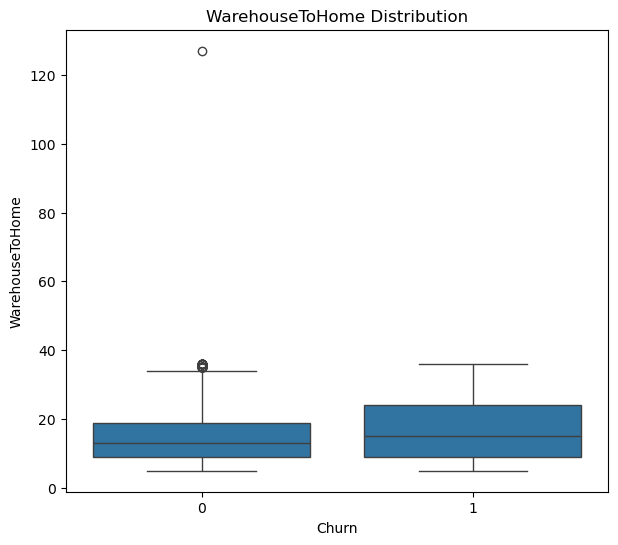

In [24]:
plt.figure(figsize=(7, 6))
sns.boxplot(data=df, x='Churn', y='WarehouseToHome')
plt.title('WarehouseToHome Distribution')
plt.xlabel('Churn')

plt.show()

In [25]:
df[(df['WarehouseToHome']>40)]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
2717,26.0,127.0,4,Mobile Phone,1,Married,4,0,1.0,159.82,0


Kolom WarehouseToHome merepresentasikan jarak antara gudang dan rumah pelanggan. Dalam konteks e-commerce, adalah hal yang wajar apabila terdapat pelanggan dengan jarak rumah yang cukup jauh dari gudang, mengingat sistem belanja dilakukan secara online. Oleh karena itu, pada tahap preprocessing nanti, saya akan menangani outlier pada kolom ini menggunakan metode Scaling, agar Machine Learning dapat mempelajari seluruh data WarehouseToHome serta mengurangi jarak dari outliernya.

**DaySinceLastOrder**

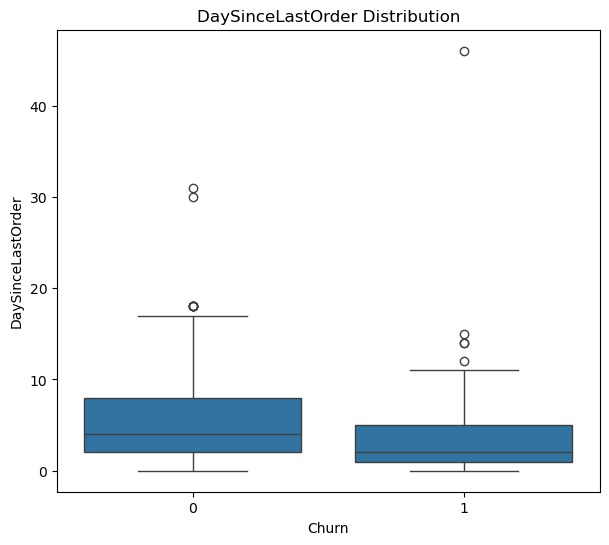

In [26]:
plt.figure(figsize=(7, 6))
sns.boxplot(data=df, x='Churn', y='DaySinceLastOrder')
plt.title('DaySinceLastOrder Distribution')
plt.xlabel('Churn')

plt.show()

In [27]:
df[(df['DaySinceLastOrder']>30)]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3591,0.0,6.0,4,Fashion,3,Married,6,0,46.0,206.09,1
3830,4.0,12.0,4,Mobile Phone,5,Married,7,0,31.0,157.04,0


Kolom DaySinceLastOrder merupakan jumlah hari sejak pemesanan terakhir oleh pelanggan. Disini terlihat bahwa orang yang memiliki DaySinceLastOrder lebih dari 30 hari memiliki kemungkinan untuk tidak churn. Dengan demikian untuk menghandle outlier ini saya akan menggunakan scaling agar Machine Learning dapat mempelajari seluruh data DaySinceLastOrder serta mengurangi jarak dari outliernya.

## **Corrrelation**

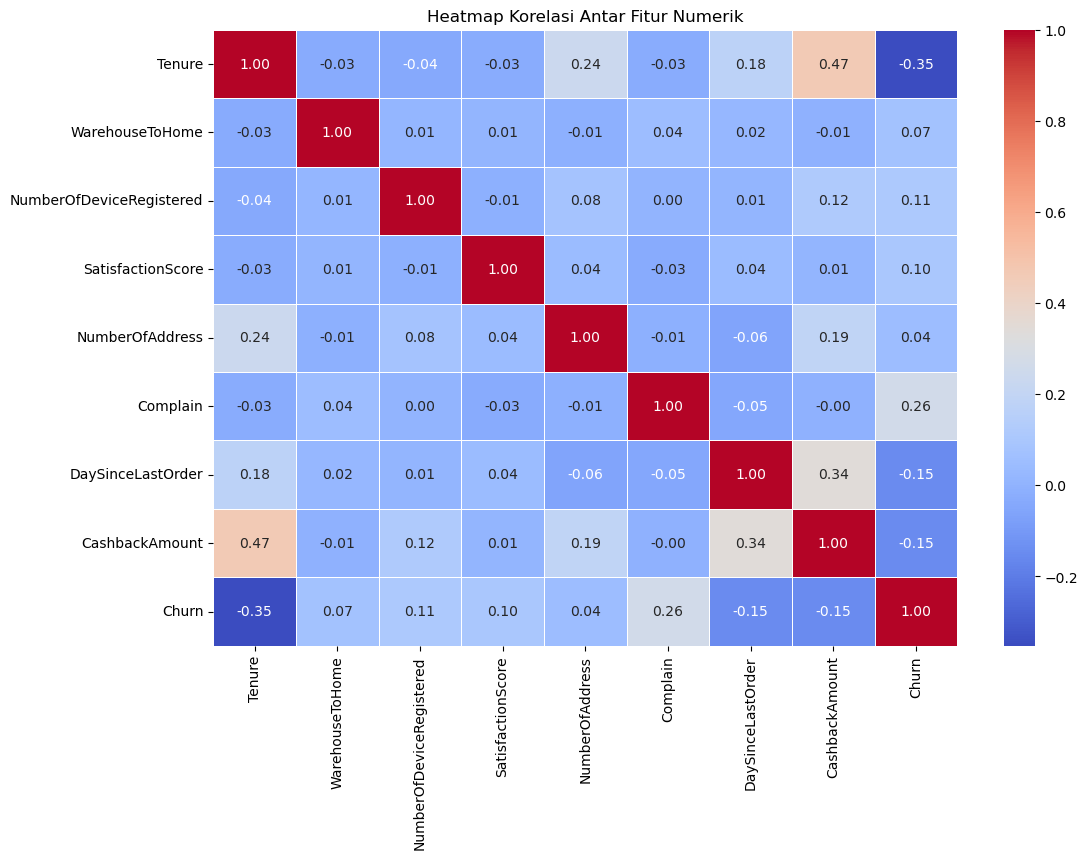

In [28]:
# Pilih hanya kolom numerik (termasuk 'Churn')
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Hitung korelasi
corr = df[numerik_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()


Insight :
- Terlihat bahwa kodrelasi terkuat ada pada pada Tenure yaitu 0.35 dan memiliki hubungan ke arah negatif
- Feature lain terlihat tidak memiliki hubungan yang signifikan

# **Machine Learning**

## **Define X and y**

In [29]:
X=df.drop(columns=['Churn'])
X.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17


In [30]:
y=df['Churn']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

- Mendefinisikan X sebagai featurnya serta y sebagai target (Churn)

## **Data Train Test Splitting**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

In [32]:
X.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17


- Data di bagi menjadi Data Train dan Test dengan rasio 80:20 (0.2), serta menggunakan stratify y karena ingin proporsi target (Churn/Not Churn) sama.

## **Preprocessing**

Imputer :

    - Iterative :'Tenure', 'WarehouseToHome', 'DaySinceLastOrder'

Encoding :

    - OneHot :'PreferedOrderCat', 'MaritalStatus'

Scaling :

    - Robust : 'NumberOfAddress', 'NumberOfDeviceRegistered', 'CashbackAmount','Tenure', 'WarehouseToHome', 'DaySinceLastOrder'

pass : 'SatisfactionScore', 'Complain'

In [33]:
pipeImputeScale=Pipeline([
    ('Imputer', IterativeImputer(random_state=0)),
    ('Scaling', RobustScaler())
])

In [34]:
transformer = ColumnTransformer([
    ('pipeImputeScaling', pipeImputeScale, X_train.drop(columns=['SatisfactionScore', 'Complain']).describe().columns),
    ('OneHot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
], remainder='passthrough')

- Pada data preprocessing disiapkan sebuah transformer yang akan merubah data seperti Mengisi missing value, Scaling, dan Encoding
- Imputer yang digunakan adalah iterative imputer, namun akan di looping pada saat hyperparameter tunning untuk mendapat imputer terbaik
- Data kategorikal akan seperti 'PreferedOrderCat', 'MaritalStatus', di encoding menggunakan one hot, karena tidak memiliki urutan/tingkatan yang jelas serta unik value yang sedikit
- 'SatisfactionScore', 'Complain', sudah berupa angka, dimana statisfaction score bersifat ordinal serta complain hanya terdiri dari 0 dan 1. jadi akan dibiarkan saja
- Scaling yang digunakan pada transformer adalah Robustscaler karena data tidak terdistribusi normal serta terdapat Outlier


## **Cross Validation**

pada bagian ini akan dicoba beberapa model yang bertipe klasifikasi untuk menentukan model terbaik, dengan base parameternya.

In [35]:
tree=DecisionTreeClassifier(random_state=0)
rf=RandomForestClassifier(random_state=0)
aBoost=AdaBoostClassifier(random_state=0)
gBoost=GradientBoostingClassifier(random_state=0)
xgBoost=XGBClassifier(random_state=0)
lgbm = LGBMClassifier(objective='binary', random_state=0)

In [36]:
f2=make_scorer(fbeta_score, beta=2)

list_model = [tree, rf, aBoost, gBoost, xgBoost, lgbm]
list_f2_all = []
list_f2_mean = []
list_f2_std = []

for model in list_model:
    # pipe_model
    pipe_model = Pipeline([
        ("preprocessing", transformer),
        ("modeling", model)
    ])

    # cv
    cv_score = cross_val_score(
        estimator = pipe_model,
        X= X_train,
        y= y_train,
        cv= 5,
        scoring = f2
    )
    list_f2_all.append(cv_score.round(2))
    list_f2_mean.append(cv_score.mean())
    list_f2_std.append(cv_score.std())

df_cv = pd.DataFrame()
df_cv["model"] = list_model
df_cv["f2"] = list_f2_all
df_cv["f2_mean"] = list_f2_mean
df_cv["f2_std"] = list_f2_std
df_cv

[LightGBM] [Info] Number of positive: 341, number of negative: 1747
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 2088, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163314 -> initscore=-1.633773
[LightGBM] [Info] Start training from score -1.633773
[LightGBM] [Info] Number of positive: 341, number of negative: 1747
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 476
[LightGBM] [Info] Number of data points in the train set: 2088, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163314 -> initscore=-1.633773
[LightGBM] [

,model,f2,f2_mean,f2_std
0,DecisionTreeClassifier(random_state=0),"[0.65, 0.59, 0.57, 0.51, 0.65]",0.595214,0.053707
1,RandomForestClassifier(random_state=0),"[0.69, 0.6, 0.53, 0.51, 0.63]",0.591218,0.065407
2,AdaBoostClassifier(random_state=0),"[0.59, 0.61, 0.54, 0.47, 0.55]",0.552981,0.048924
3,GradientBoostingClassifier(random_state=0),"[0.67, 0.58, 0.56, 0.53, 0.61]",0.593087,0.048256
4,"XGBClassifier(base_score=None, booster=None, c...","[0.75, 0.65, 0.6, 0.65, 0.68]",0.665740,0.045977
5,"LGBMClassifier(objective='binary', random_stat...","[0.72, 0.63, 0.62, 0.67, 0.69]",0.666251,0.038162


- Ternyata diperoleh model terbaik yaitu XGBClassifier dan LGBMClassifier yang memperoleh f2 score rata-rata 66,5% dan 66,6% dimana score tersebut lebih tinggi daripada yang lain.
- Namun saya akan menggunakan XGBClassifier karena mempunyai peluang akurasi yang lebih baik setelah ditunning karena memiliki parameter yang lebih banyak.

## **Hyperparameter Tunning**

Disini ada beberapa parameter yang saya tetapkan (tidak ditunning), agar proses fitting menjadi sangat lama :

use_label_encoder=False
- Fungsi: Menonaktifkan label encoder bawaan XGBoost.
- Gunanya: Diperlukan sejak XGBoost versi 1.3 ke atas karena encoder bawaan dianggap deprecated. Biasanya label (target) sudah dalam bentuk numerik, jadi tidak perlu encode lagi.

eval_metric='logloss'
- Fungsi: Menentukan metrik evaluasi yang digunakan saat pelatihan.
- Gunanya: 'logloss' (logarithmic loss) cocok untuk klasifikasi biner karena mengukur seberapa “jauh” prediksi probabilitas dari nilai target sesungguhnya.

learning_rate=0.1
- Fungsi: Mengontrol seberapa besar kontribusi setiap pohon terhadap prediksi akhir.
- Gunanya: Nilai kecil (misalnya 0.01–0.1) membuat model belajar lebih lambat tapi lebih akurat (perlu lebih banyak pohon).

In [37]:
# define hyperparameter
xgb = XGBClassifier(
    random_state=0,
    use_label_encoder=False,
    eval_metric='logloss',
    learning_rate=0.1
)

hyperparam = {
    "modeling__n_estimators": [100, 150, 200],
    "modeling__max_depth" : [3, 6, 9, 12],
    "modeling__booster" : ['gbtree', 'gblinear', 'dart'],
    'modeling__scale_pos_weight':[2, 3, 4],
}

# define pipe_model
pipe_model = Pipeline([
    ("preprocessing", transformer),
    ("modeling", xgb)
])

In [38]:
grid_search = GridSearchCV( 
    estimator= pipe_model,
    param_grid=hyperparam,
    scoring = f2,
    n_jobs = -1,
    cv = 5
)

In [39]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeImputeScaling',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          IterativeImputer(random_state=0)),
                                                                                         ('Scaling',
                                                                                          RobustScaler())]),
                                                                         Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'modeling__booster': ['gbtree', 'gblinear', 'dart'],
                         'modeling__max_depth': [3, 6, 9, 12],
                         'modeling__n_estimators': [100, 150, 200],
                         'modeling__scale_pos_weight': [2, 3, 4]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [40]:
pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__booster,param_modeling__max_depth,param_modeling__n_estimators,param_modeling__scale_pos_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
77,2.813410,0.010285,0.039417,0.009114,dart,3,150,4,"{'modeling__booster': 'dart', 'modeling__max_d...",0.769231,0.739514,0.731982,0.680804,0.720621,0.728430,0.028738,1
5,0.145644,0.030226,0.027609,0.024104,gbtree,3,150,4,"{'modeling__booster': 'gbtree', 'modeling__max...",0.769231,0.739514,0.731982,0.680804,0.720621,0.728430,0.028738,1
80,5.114941,0.072694,0.066524,0.036291,dart,3,200,4,"{'modeling__booster': 'dart', 'modeling__max_d...",0.785398,0.730337,0.704545,0.685393,0.720621,0.725259,0.033712,3
8,0.133005,0.014059,0.018272,0.001643,gbtree,3,200,4,"{'modeling__booster': 'gbtree', 'modeling__max...",0.785398,0.730337,0.704545,0.685393,0.720621,0.725259,0.033712,3
74,1.532235,0.031885,0.033657,0.008832,dart,3,100,4,"{'modeling__booster': 'dart', 'modeling__max_d...",0.772627,0.703297,0.738255,0.691964,0.714286,0.724086,0.028695,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.110407,0.033068,0.017545,0.004292,gblinear,9,150,2,"{'modeling__booster': 'gblinear', 'modeling__m...",0.715935,0.632184,0.545024,0.654206,0.678161,0.645102,0.057229,101
45,0.126041,0.019545,0.025806,0.012721,gblinear,6,100,2,"{'modeling__booster': 'gblinear', 'modeling__m...",0.707657,0.630734,0.546318,0.655738,0.653670,0.638823,0.052663,105
63,0.072852,0.003762,0.017132,0.004491,gblinear,12,100,2,"{'modeling__booster': 'gblinear', 'modeling__m...",0.707657,0.630734,0.546318,0.655738,0.653670,0.638823,0.052663,105
54,0.084036,0.004612,0.018153,0.002318,gblinear,9,100,2,"{'modeling__booster': 'gblinear', 'modeling__m...",0.707657,0.630734,0.546318,0.655738,0.653670,0.638823,0.052663,105


In [41]:
grid_search.best_params_

{'modeling__booster': 'gbtree',
 'modeling__max_depth': 3,
 'modeling__n_estimators': 150,
 'modeling__scale_pos_weight': 4}

In [42]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeImputeScaling',
                                                  Pipeline(steps=[('Imputer',
                                                                   IterativeImputer(random_state=0)),
                                                                  ('Scaling',
                                                                   RobustScaler())]),
                                                  Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')),
                                                 ('OneHot',
                                                  OneHot...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=150, n_jobs=None,
                               num_parallel_tree=None, ...))])

## **Predict**

### **Before Tunning**

In [43]:
# define pipe_model
pipe_model = Pipeline([
    ("preprocessing", transformer),
    ("modeling", XGBClassifier(random_state=0))
])

#Fitting
pipe_model.fit(X_train, y_train)

#Predict
y_pred_before=pipe_model.predict(X_test)

#Scoring
fbeta_score(y_test, y_pred_before, beta=2)

0.7059961315280464

### **After Tunning**

In [44]:
# define pipe_model
best_model=grid_search.best_estimator_

#Fitting
best_model.fit(X_train, y_train)

#Predict
y_pred_after=best_model.predict(X_test)

#Scoring
fbeta_score(y_test, y_pred_after, beta=2)

0.8024691358024691

## **Confusion Metric**

In [45]:
# before tuning
cm_before = confusion_matrix(y_test, y_pred_before)
cm_before

array([[530,  16],
       [ 34,  73]], dtype=int64)

In [46]:
# after tuning
cm_after = confusion_matrix(y_test, y_pred_after)
cm_after

array([[498,  48],
       [ 16,  91]], dtype=int64)

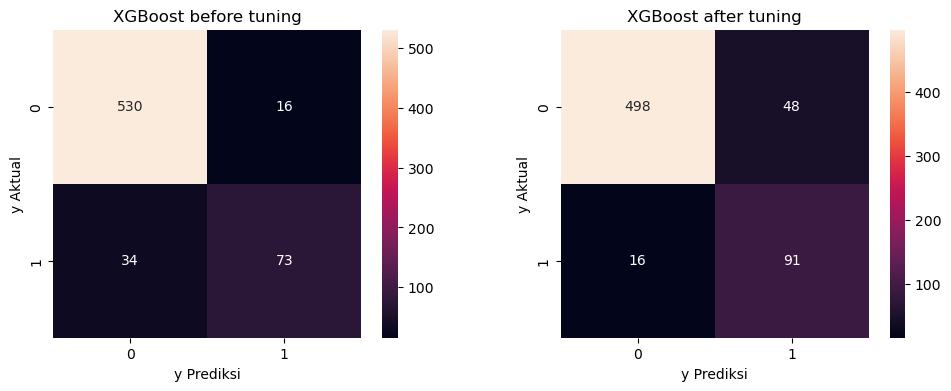

In [47]:
plt.figure(figsize=(12,4))

# Model XGBoost before tuning
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_before), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('XGBoost before tuning')

# Model XGBoost after tuning
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_after), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('XGBoost after tuning');

- **False Positive (FP):**

    - Model memprediksi pelanggan akan churn, padahal sebenarnya tidak.
    - **Estimasi kerugian:** $100 per pelanggan.


- **False Negative (FN):**

    - Model memprediksi pelanggan akan tetap, padahal sebenarnya churn.
    - **Estimasi kerugian:** $500 per pelanggan.

Insight :
- Pada Garfik confusion matric terlihat model before tunning salah memprediksi FN sebanyak 34 Data sedangkan FP sebanyak 16 Data
- Sedangkan Pada Garfik confusion matric terlihat model after tunning salah prediksi FN turun menjadi 16 data, sedangkan FP nya naik menjadi 48 Data

## **Feature Importance**

In [48]:
best_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeImputeScaling',
                                                  Pipeline(steps=[('Imputer',
                                                                   IterativeImputer(random_state=0)),
                                                                  ('Scaling',
                                                                   RobustScaler())]),
                                                  Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')),
                                                 ('OneHot',
                                                  OneHot...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=150, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [49]:
best_model['modeling'].feature_importances_

array([0.23745503, 0.03570092, 0.04557908, 0.05921789, 0.05154163,
       0.06249234, 0.02205314, 0.11089087, 0.        , 0.00702833,
       0.03256258, 0.07638273, 0.07028052, 0.06365871, 0.1251562 ],
      dtype=float32)

In [50]:
best_model['preprocessing'].transformers_[0][2]

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [51]:
scaling=list(best_model['preprocessing'].transformers_[0][1].get_feature_names_out())
oneHot=list(best_model['preprocessing'].transformers_[1][1].get_feature_names_out())
passtr =list(best_model['preprocessing'].transformers_[2][1].get_feature_names_out())

In [52]:
col=scaling+oneHot+passtr

imp = pd.DataFrame({
    'feature':col,
    'importance':best_model['modeling'].feature_importances_
}).sort_values('importance', ascending=False)

imp

,feature,importance
0,Tenure,0.237455
14,Complain,0.125156
7,PreferedOrderCat_Laptop & Accessory,0.110891
11,MaritalStatus_Married,0.076383
12,MaritalStatus_Single,0.070281
13,SatisfactionScore,0.063659
5,CashbackAmount,0.062492
3,NumberOfAddress,0.059218
4,DaySinceLastOrder,0.051542
2,NumberOfDeviceRegistered,0.045579


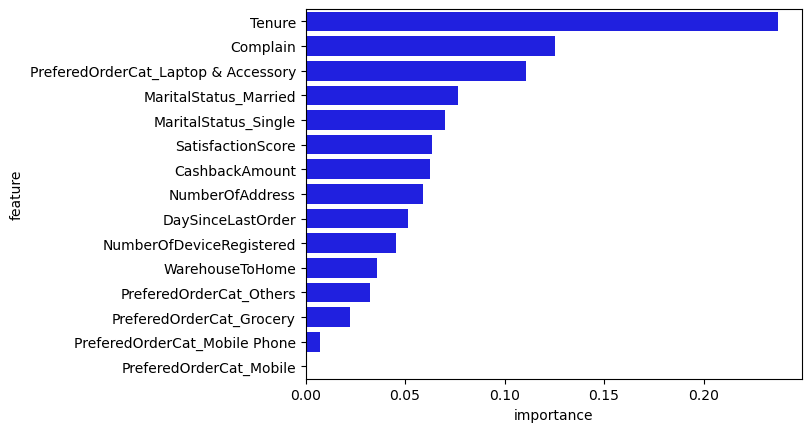

In [53]:
sns.barplot(data=imp, y='feature', x='importance', color='b');

Insight :
- Terlihat bahwa feature yang paling berpengaruh adalah Tenure, Complain dan PreferedOrderCat_Laptop & Accessory. Sedangkan feature yang lain tidak berpengaruh signifikan


# **Kesimpulan**

Berdasarkan hasil metric evaluation Machine Learning berhasil memperoleh F2 Score sebesar 80% untuk memprediksi pelanggan Churn atau Not Churn dari dari data test. F2 Score adalah metrik evaluasi yang mengutamakan recall lebih tinggi daripada precision (karena recall diberi bobot lebih besar). Data test sendiri terdiri dari 653 data dimana secara metric Machine Learning salah memprediksi 16 Data FN, Serta 48 Data FN. 

Apa bila dihitung berikut merupakan ilustrasi kerugian perusahaan sebelum dan sesudah menggunakan Machine Learning

**Tanpa menggunakan ML**

Sebelum menggunakan ML, perusahaan tidak mengetahui siapa saja customer yg akan churn, sehingga melakukan tindakan custumer retention untuk mencegah kehilangan pelanggan.

Kita asumsikan ketika seorang customer diberikan promosi, maka customer tersebut tidak akan churn.

|                 | Predicted (0) | Predicted (1) |
| :-------------: | :-----------: | :-----------: |
| Actual (0)      | 0             | 546          |
| Actual (1)      | 0             | 107           |

- Pengeluaran perusahaan untuk promosi (TP+FP+TN+FN): $100 x 653 = $65,300
- Promosi yang tepat sasaran pada orang yang churn (TP+FN): $100 x 107 = $10,700
- Artinya perusahaan mengeluarkan biaya promosi sia-sia pada customer loyal: $65,300 - $10,700 = $54,600

**Dengan menggunakan ML**

Setelah menggunakan ML, perusahaan jadi bisa memprediksi siapa saja customer yg akan churn, sehingga bisa mengeluarkan cost untuk promosi lebih tepat sasaran.

|                 | Predicted (0) | Predicted (1) |
| :-------------: | :-----------: | :-----------: |
| Actual (0)      | 500         | 48           |
| Actual (1)      | 16          | 91           |

- Pengeluaran perusahaan untuk salah promosi ke customer loyal (FP): $100 x 46 = $4,800
- Perusahaan kehilangan customer karena tidak terprediksi akan churn (FN): $500 x 16 = $8000
- Artinya perusahaan mengalami kerugian: $4,800 + $8000 = $12,800

**Kerugian menurun setelah pakai ML**

- Kerugian sebelum pakai ML: $54,600
- Kerugian setelah pakai ML:  $12,800
- ML berhasil menurunkan kerugian perusahaan sebesar 75% --> ($54,600 - $12,600) / $159,300

**Rekomendasi**
- Terdapat beberapa missing value pada kolom `Tenure`, `WarehouseToHome` dan `DaySinceLastOrder` yang kemudian diisi dengan imputer, untuk kedepannya alangkah lebih baik data yang diambil dengan lebih teliti lagi agar tidak terdapat missing value serta membuat prediksi akan lebih akurat dengan data real
- Terdapat feature-feature yang kurang berpengaruh signifikan terhadap hasil prediksi Machine Learning, dengan demikian dapat ditambahkan feature-feature yang lain mungkin seperti jumlah order barang, umur, dll
- Menambahkan parameter yang lebih banyak pada bagian Hyperparameter Tunning, kebetulan perangkat yang saat ini saya gunakan akan memakan waktu yang sangat lama untuk menambah parameter lain. jadi alangkah baiknya dapat mencoba berbagai parameter lain.


## **Save Final Model**

In [54]:
best_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeImputeScaling',
                                                  Pipeline(steps=[('Imputer',
                                                                   IterativeImputer(random_state=0)),
                                                                  ('Scaling',
                                                                   RobustScaler())]),
                                                  Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')),
                                                 ('OneHot',
                                                  OneHot...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=150, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
# fit
best_model.fit(X, y)

# save with pickle
pickle.dump(best_model, open('model_customer_churn.sav', 'wb'))